In [1]:
import pandas as pd

# NO lyrics

# https://medium.com/swlh/spotify-song-prediction-and-recommendation-system-b3bbc71398ad
# https://www.kaggle.com/code/sowmya96/spotify-song-prediction-and-recommendation-system
# current
# https://github.com/MattD82/Predicting-Spotify-Song-Popularity/blob/master/README.md

# ADD personal data???? (OPTIONAL)

# item feature

# PCA or t-SNE for reduction (PROB NOT)

# embedding (PROB NOT)


# ------------------
# COOK

df=pd.read_csv("https://raw.githubusercontent.com/Alex-Mak-MCW/SpotifyDataScienceProject/main/Data/processed_data.csv")

# df.shape # (2455 rows × 20 columns)

In [2]:
df

,track_name,artist,album,release_date,duration,popularity,explicit,lyrics,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Blinding Lights,The Weeknd,After Hours,2020-03-20,200040,90,0,yeah ve tryna call ve long enough maybe show l...,0.514,0.730,1.0,-5.934,1.0,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4.0
1,Shape of You,Ed Sheeran,÷ (Deluxe),2017-03-03,233712,86,0,club nt best place find lover bar go mm friend...,0.825,0.652,1.0,-3.183,0.0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,4.0
2,Someone You Loved,Lewis Capaldi,Divinely Uninspired To A Hellish Extent,2019-05-17,182160,89,0,m going time fear s one save nothing really ...,0.501,0.405,1.0,-5.679,1.0,0.0319,0.75100,0.000000,0.1050,0.446,109.891,4.0
3,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,Hollywood's Bleeding,2019-09-06,157560,85,0,2 post malone wow 3 saweetie tap feat post ma...,0.755,0.522,2.0,-4.368,1.0,0.0575,0.53300,0.000000,0.0685,0.925,89.960,4.0
4,Starboy,The Weeknd,Starboy,2016-11-25,230453,91,1,ayy m tryna put worst mood ah p1 cleaner chur...,0.679,0.587,7.0,-7.015,1.0,0.2760,0.14100,0.000006,0.1370,0.486,186.003,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,512,Mora,Primer Dia de Clases,2021-02-05,193636,75,1,NaN,0.818,0.673,4.0,-7.542,0.0,0.1480,0.34800,0.000000,0.1720,0.695,87.961,4.0
2451,Diosa,Myke Towers,Easy Money Baby,2020-01-24,214013,72,1,NaN,0.801,0.745,6.0,-3.733,0.0,0.0630,0.39800,0.006030,0.1530,0.245,104.965,4.0
2452,A-Punk,Vampire Weekend,Vampire Weekend,2008-01-29,137760,70,0,johanna drove slowly city hudson river filled ...,0.551,0.819,2.0,-4.489,1.0,0.0525,0.01030,0.043700,0.1530,0.846,174.917,4.0
2453,TQM,Fuerza Regida,TQM,2023-05-19,158965,78,1,NaN,0.786,0.853,5.0,-4.955,0.0,0.0589,0.27300,0.000000,0.1060,0.963,125.107,3.0


In [3]:
# duration into mins

df['duration_min'] = df['duration']/60000
# df_by_genres['duration_min'] = df_by_genres['duration_min'].round(2)

In [4]:
df['duration_min']

0       3.334000
1       3.895200
2       3.036000
3       2.626000
4       3.840883
          ...   
2450    3.227267
2451    3.566883
2452    2.296000
2453    2.649417
2454    3.936917
Name: duration_min, Length: 2455, dtype: float64

In [5]:
# drop duration and LYRICS
df.drop(['lyrics', 'duration'], axis=1, inplace=True)

In [6]:
df

,track_name,artist,album,release_date,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min
0,Blinding Lights,The Weeknd,After Hours,2020-03-20,90,0,0.514,0.730,1.0,-5.934,1.0,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4.0,3.334000
1,Shape of You,Ed Sheeran,÷ (Deluxe),2017-03-03,86,0,0.825,0.652,1.0,-3.183,0.0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,4.0,3.895200
2,Someone You Loved,Lewis Capaldi,Divinely Uninspired To A Hellish Extent,2019-05-17,89,0,0.501,0.405,1.0,-5.679,1.0,0.0319,0.75100,0.000000,0.1050,0.446,109.891,4.0,3.036000
3,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,Hollywood's Bleeding,2019-09-06,85,0,0.755,0.522,2.0,-4.368,1.0,0.0575,0.53300,0.000000,0.0685,0.925,89.960,4.0,2.626000
4,Starboy,The Weeknd,Starboy,2016-11-25,91,1,0.679,0.587,7.0,-7.015,1.0,0.2760,0.14100,0.000006,0.1370,0.486,186.003,4.0,3.840883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,512,Mora,Primer Dia de Clases,2021-02-05,75,1,0.818,0.673,4.0,-7.542,0.0,0.1480,0.34800,0.000000,0.1720,0.695,87.961,4.0,3.227267
2451,Diosa,Myke Towers,Easy Money Baby,2020-01-24,72,1,0.801,0.745,6.0,-3.733,0.0,0.0630,0.39800,0.006030,0.1530,0.245,104.965,4.0,3.566883
2452,A-Punk,Vampire Weekend,Vampire Weekend,2008-01-29,70,0,0.551,0.819,2.0,-4.489,1.0,0.0525,0.01030,0.043700,0.1530,0.846,174.917,4.0,2.296000
2453,TQM,Fuerza Regida,TQM,2023-05-19,78,1,0.786,0.853,5.0,-4.955,0.0,0.0589,0.27300,0.000000,0.1060,0.963,125.107,3.0,2.649417


In [7]:
# df.shape # (2455, 19)

In [8]:
df.iloc[:, 4:]

,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min
0,90,0,0.514,0.730,1.0,-5.934,1.0,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4.0,3.334000
1,86,0,0.825,0.652,1.0,-3.183,0.0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,4.0,3.895200
2,89,0,0.501,0.405,1.0,-5.679,1.0,0.0319,0.75100,0.000000,0.1050,0.446,109.891,4.0,3.036000
3,85,0,0.755,0.522,2.0,-4.368,1.0,0.0575,0.53300,0.000000,0.0685,0.925,89.960,4.0,2.626000
4,91,1,0.679,0.587,7.0,-7.015,1.0,0.2760,0.14100,0.000006,0.1370,0.486,186.003,4.0,3.840883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,75,1,0.818,0.673,4.0,-7.542,0.0,0.1480,0.34800,0.000000,0.1720,0.695,87.961,4.0,3.227267
2451,72,1,0.801,0.745,6.0,-3.733,0.0,0.0630,0.39800,0.006030,0.1530,0.245,104.965,4.0,3.566883
2452,70,0,0.551,0.819,2.0,-4.489,1.0,0.0525,0.01030,0.043700,0.1530,0.846,174.917,4.0,2.296000
2453,78,1,0.786,0.853,5.0,-4.955,0.0,0.0589,0.27300,0.000000,0.1060,0.963,125.107,3.0,2.649417


In [9]:
df.iloc[:, 4:].describe()

,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min
count,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000
mean,74.689613,0.300611,0.650165,0.649584,5.332383,-6.552519,0.594705,0.092943,0.216581,0.021428,0.172252,0.508771,120.651448,3.945825,3.671897
std,11.182444,0.458617,0.149517,0.182336,3.622396,2.896937,0.491049,0.090221,0.246266,0.108462,0.134431,0.231522,28.619425,0.329106,0.880452
min,0.000000,0.000000,0.000000,0.003420,0.000000,-28.460000,0.000000,0.000000,0.000008,0.000000,0.021000,0.000000,0.000000,0.000000,1.066983
25%,72.000000,0.000000,0.554000,0.536000,2.000000,-7.806000,0.000000,0.037800,0.028900,0.000000,0.091150,0.328500,98.006000,4.000000,3.157767
50%,76.000000,0.000000,0.666000,0.670000,5.000000,-5.980000,1.000000,0.054900,0.115000,0.000001,0.120000,0.504000,119.705000,4.000000,3.573333
75%,80.000000,1.000000,0.759000,0.787000,8.000000,-4.668000,1.000000,0.105000,0.321000,0.000123,0.208000,0.693500,138.769000,4.000000,4.042142
max,100.000000,1.000000,0.970000,0.995000,11.000000,-0.514000,1.000000,0.592000,0.994000,1.000000,0.970000,0.981000,210.164000,5.000000,10.217100


In [10]:
# make a feature, 'upbeat


sum_upbeat = df['danceability'] + df['energy']

df['upbeat'] = sum_upbeat/2
df

,track_name,artist,album,release_date,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min,upbeat
0,Blinding Lights,The Weeknd,After Hours,2020-03-20,90,0,0.514,0.730,1.0,-5.934,1.0,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4.0,3.334000,0.6220
1,Shape of You,Ed Sheeran,÷ (Deluxe),2017-03-03,86,0,0.825,0.652,1.0,-3.183,0.0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,4.0,3.895200,0.7385
2,Someone You Loved,Lewis Capaldi,Divinely Uninspired To A Hellish Extent,2019-05-17,89,0,0.501,0.405,1.0,-5.679,1.0,0.0319,0.75100,0.000000,0.1050,0.446,109.891,4.0,3.036000,0.4530
3,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,Hollywood's Bleeding,2019-09-06,85,0,0.755,0.522,2.0,-4.368,1.0,0.0575,0.53300,0.000000,0.0685,0.925,89.960,4.0,2.626000,0.6385
4,Starboy,The Weeknd,Starboy,2016-11-25,91,1,0.679,0.587,7.0,-7.015,1.0,0.2760,0.14100,0.000006,0.1370,0.486,186.003,4.0,3.840883,0.6330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,512,Mora,Primer Dia de Clases,2021-02-05,75,1,0.818,0.673,4.0,-7.542,0.0,0.1480,0.34800,0.000000,0.1720,0.695,87.961,4.0,3.227267,0.7455
2451,Diosa,Myke Towers,Easy Money Baby,2020-01-24,72,1,0.801,0.745,6.0,-3.733,0.0,0.0630,0.39800,0.006030,0.1530,0.245,104.965,4.0,3.566883,0.7730
2452,A-Punk,Vampire Weekend,Vampire Weekend,2008-01-29,70,0,0.551,0.819,2.0,-4.489,1.0,0.0525,0.01030,0.043700,0.1530,0.846,174.917,4.0,2.296000,0.6850
2453,TQM,Fuerza Regida,TQM,2023-05-19,78,1,0.786,0.853,5.0,-4.955,0.0,0.0589,0.27300,0.000000,0.1060,0.963,125.107,3.0,2.649417,0.8195


In [11]:
df['discoability']=(df['danceability'] + df['energy']+df['loudness'])/3

# 1st goal: predict popularity of a song

In [12]:
# identify x and y:
x = df.iloc[:, 4:] # all numeric column
X = x.drop('valence', axis=1)

# danceability or valence
# FUCK IT LET'S DO VALENCE
y = df['valence']

In [13]:
import numpy as np
col_list=list(np.array(X.columns))
col_list

['popularity',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'tempo',
 'time_signature',
 'duration_min',
 'upbeat',
 'discoability']

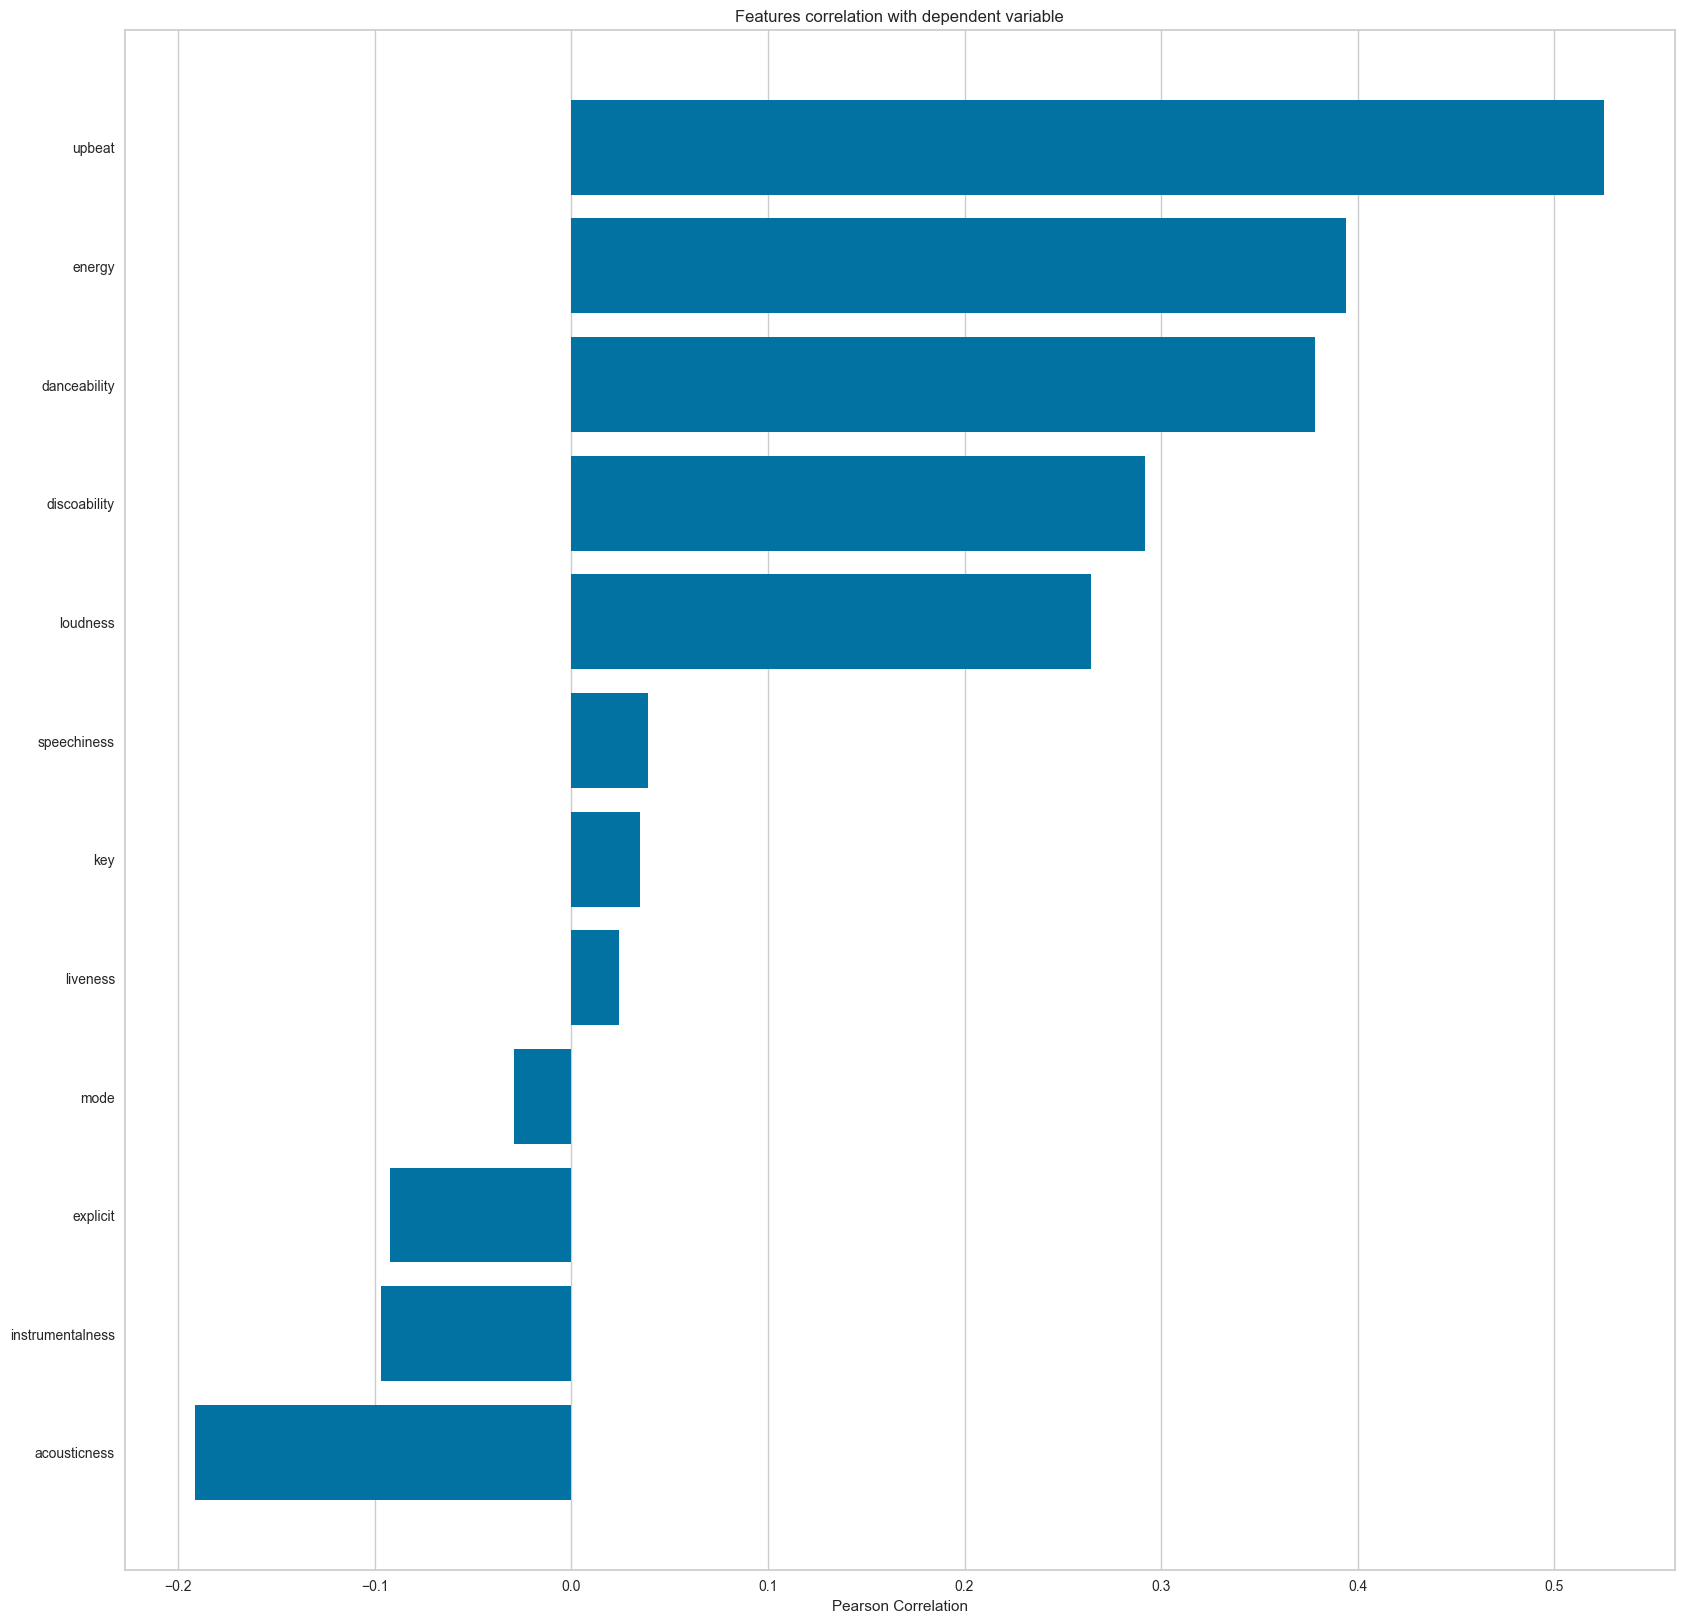

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [45]:
# 1.1 feature correlation
import matplotlib.pyplot as plt
from yellowbrick.target import FeatureCorrelation

features = np.array(np.array(X.columns))

# Instantiate the visualizer
# visualizer = FeatureCorrelation(labels=features, sort=True)
visualizer = FeatureCorrelation(labels=features, sort=True, colors=['blue', 'green', 'red', 'orange', 'purple'])

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()

In [16]:
# Calculate and print the correlation values sorted in descending order
correlation_values = pd.DataFrame(visualizer.features_, columns=['Feature'])
correlation_values['Correlation'] = visualizer.scores_
correlation_values_sorted = correlation_values.sort_values(by='Correlation', ascending=False)
print(correlation_values_sorted)

             Feature  Correlation
15            upbeat     0.525521
14            energy     0.394337
13      danceability     0.378490
12      discoability     0.291888
11          loudness     0.264318
10    time_signature     0.111027
9              tempo     0.039179
8        speechiness     0.038980
7                key     0.034624
6           liveness     0.024151
5               mode    -0.029141
4         popularity    -0.055926
3           explicit    -0.092167
2   instrumentalness    -0.097152
1       duration_min    -0.119395
0       acousticness    -0.191463


In [17]:
# import seaborn as sns

# # determine multicolinearity among features (x)

# sns.pairplot(X_train_selected)

In [18]:
# Calculate the correlation matrix
correlation_matrix = X.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                  popularity  explicit  danceability    energy       key  \
popularity          1.000000  0.073186      0.011529  0.022812  0.012749   
explicit            0.073186  1.000000      0.269450 -0.048955 -0.023376   
danceability        0.011529  0.269450      1.000000  0.076679  0.026630   
energy              0.022812 -0.048955      0.076679  1.000000  0.028904   
key                 0.012749 -0.023376      0.026630  0.028904  1.000000   
loudness            0.060587  0.060444      0.211779  0.709608  0.016237   
mode               -0.010377 -0.077612     -0.118291 -0.070525 -0.129041   
speechiness         0.010134  0.384810      0.206475  0.030197  0.042936   
acousticness       -0.057392 -0.068495     -0.172673 -0.598885 -0.024935   
instrumentalness   -0.052149 -0.080159     -0.122341 -0.099075  0.022084   
liveness           -0.048119  0.045005     -0.091114  0.164231 -0.003327   
tempo               0.003262  0.039926     -0.099439  0.110376  0.02

In [19]:
# import seaborn as sns

# # Plot correlation heatmap
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Heatmap')
# plt.show()


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


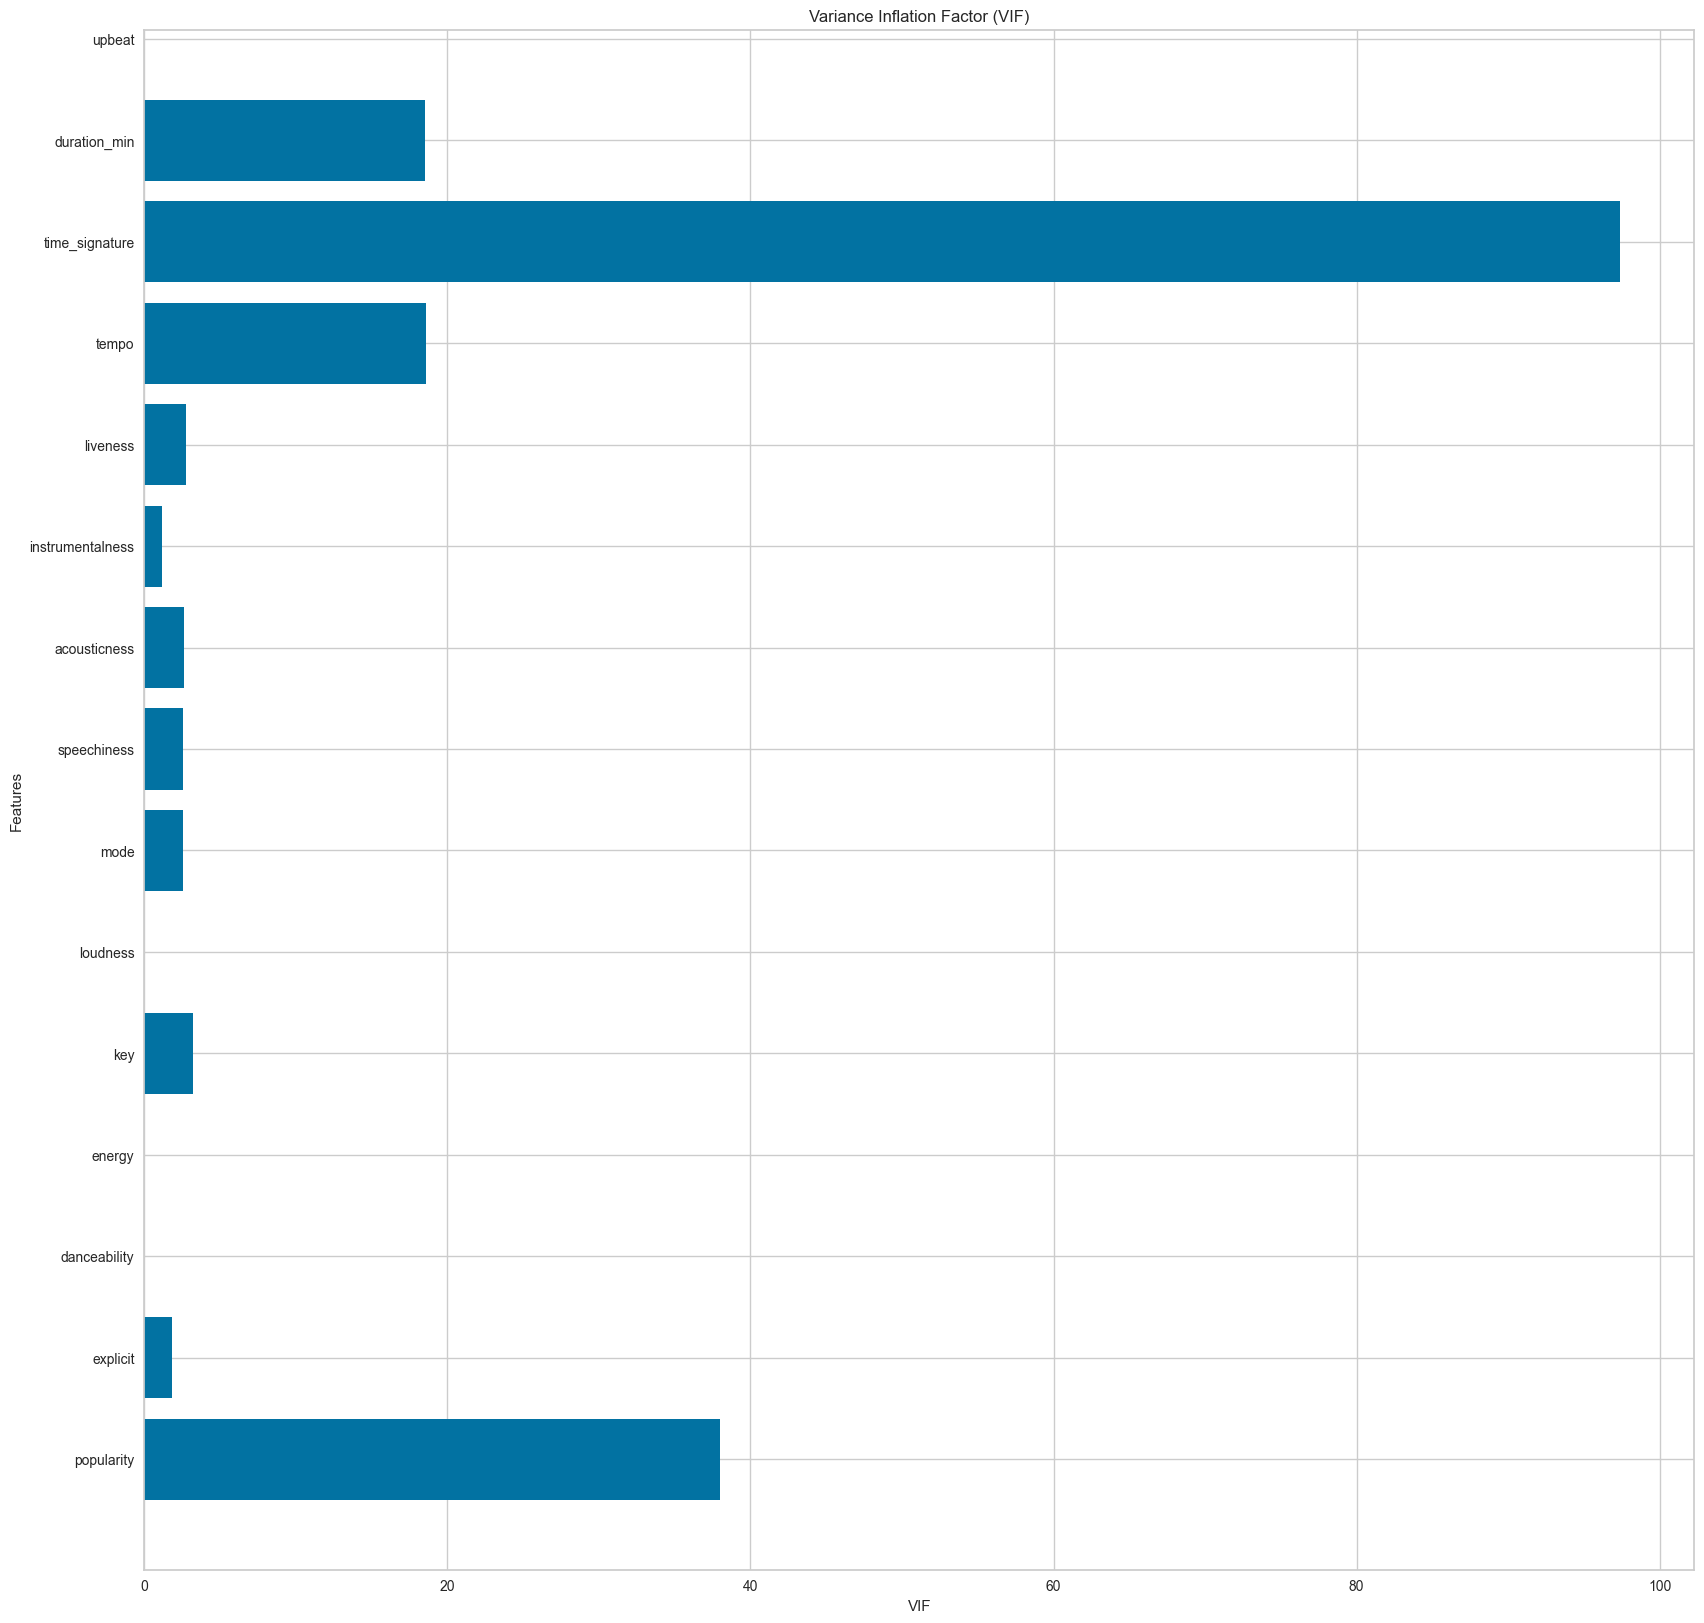

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Plot VIF
plt.barh(vif_data["feature"], vif_data["VIF"])
plt.xlabel('VIF')
plt.ylabel('Features')
plt.title('Variance Inflation Factor (VIF)')
plt.show()


In [21]:
X=X.drop(['time_signature', 'popularity' ], axis=1)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


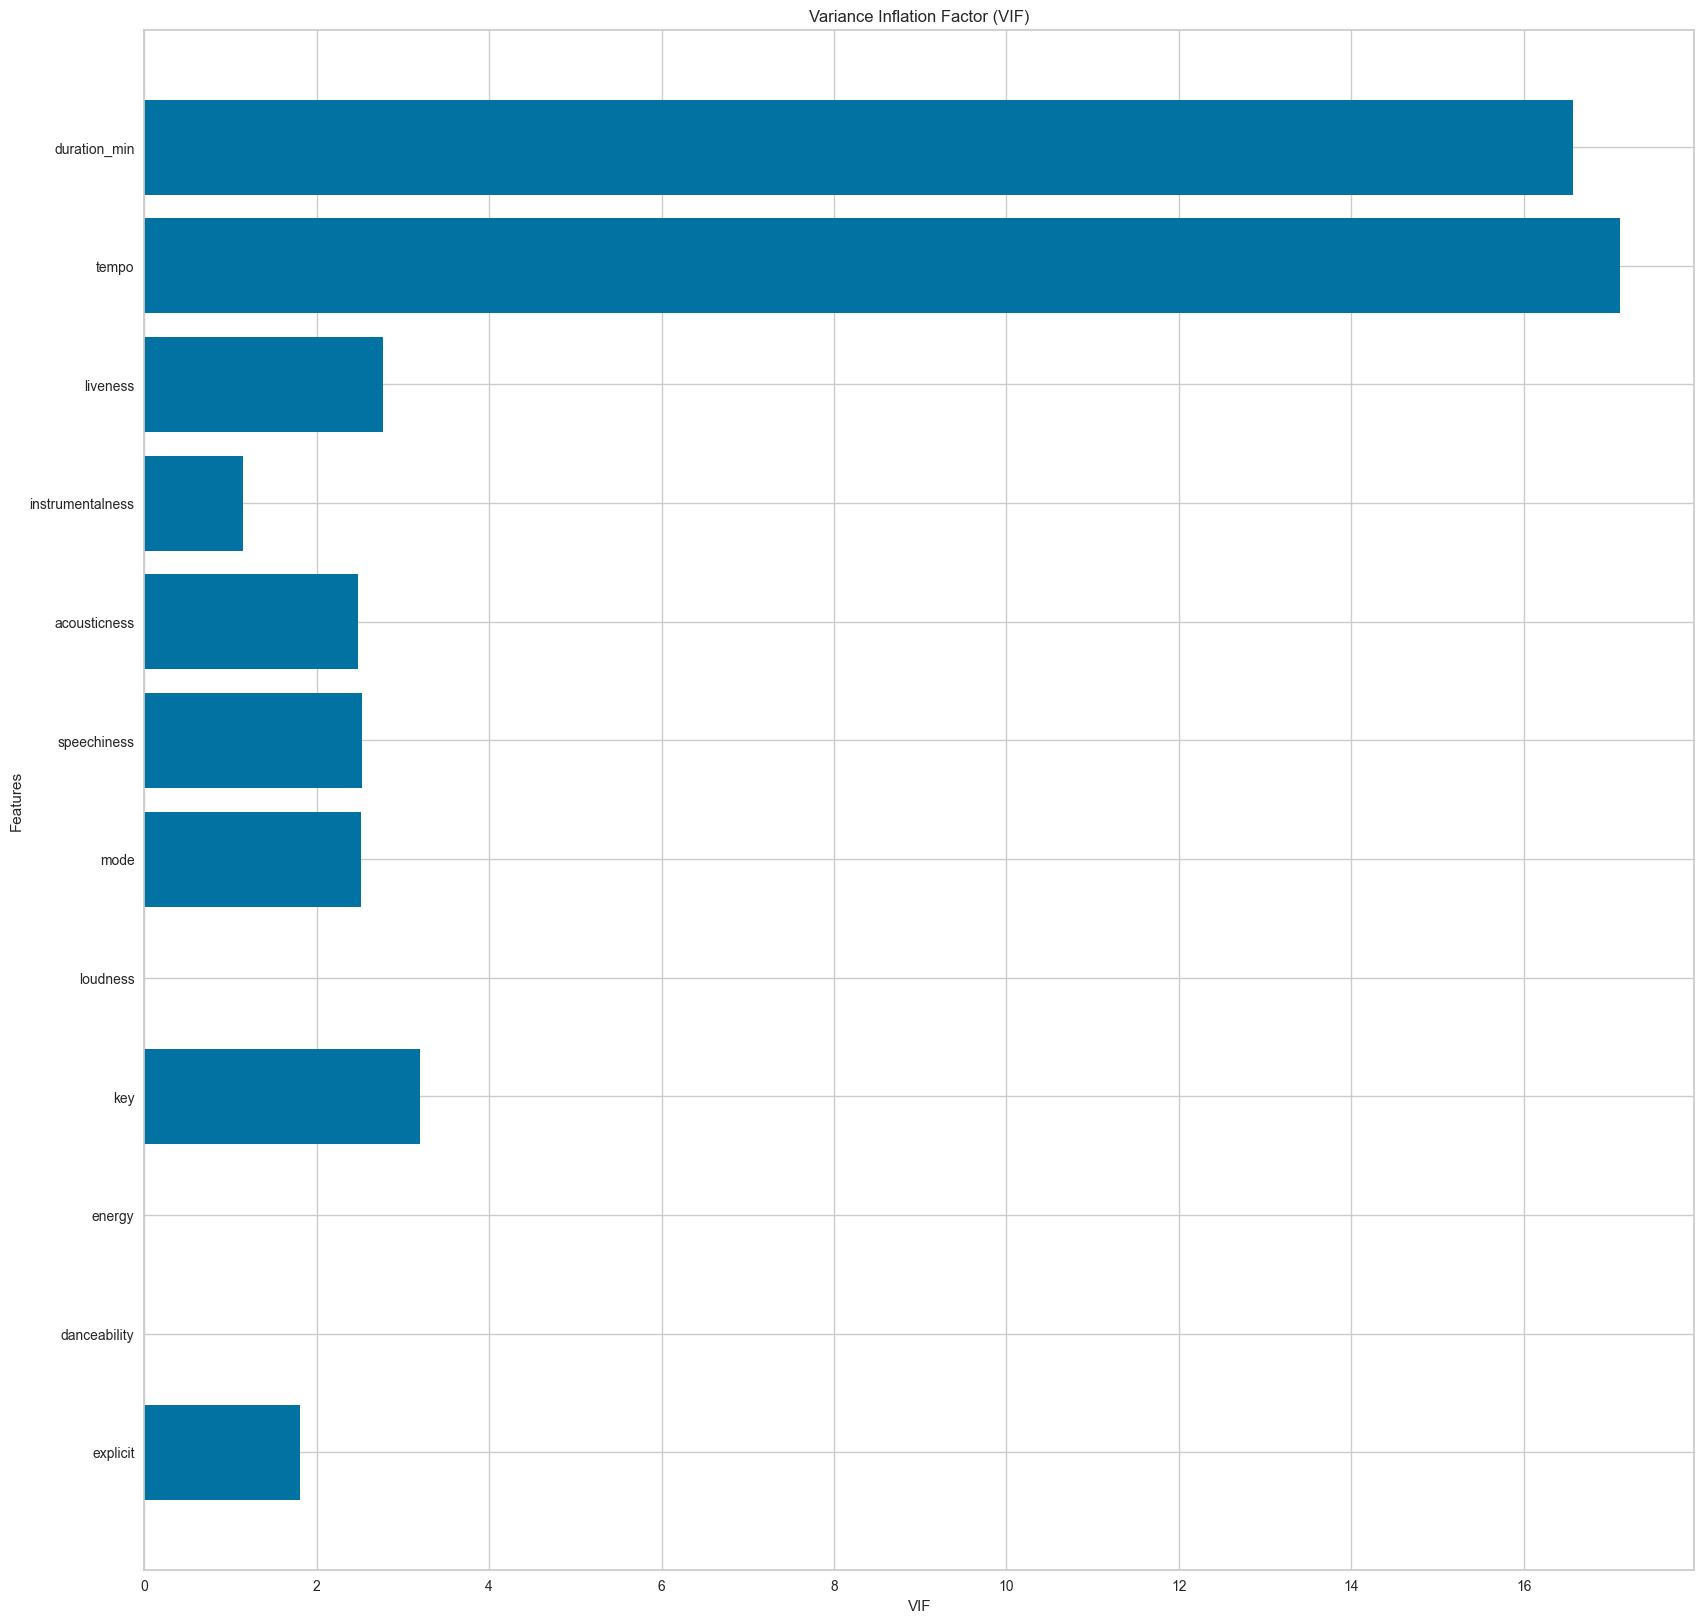

In [22]:
# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Plot VIF
plt.barh(vif_data["feature"], vif_data["VIF"])
plt.xlabel('VIF')
plt.ylabel('Features')
plt.title('Variance Inflation Factor (VIF)')
plt.show()

In [23]:
X=X.drop(['duration_min', 'tempo' ], axis=1)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


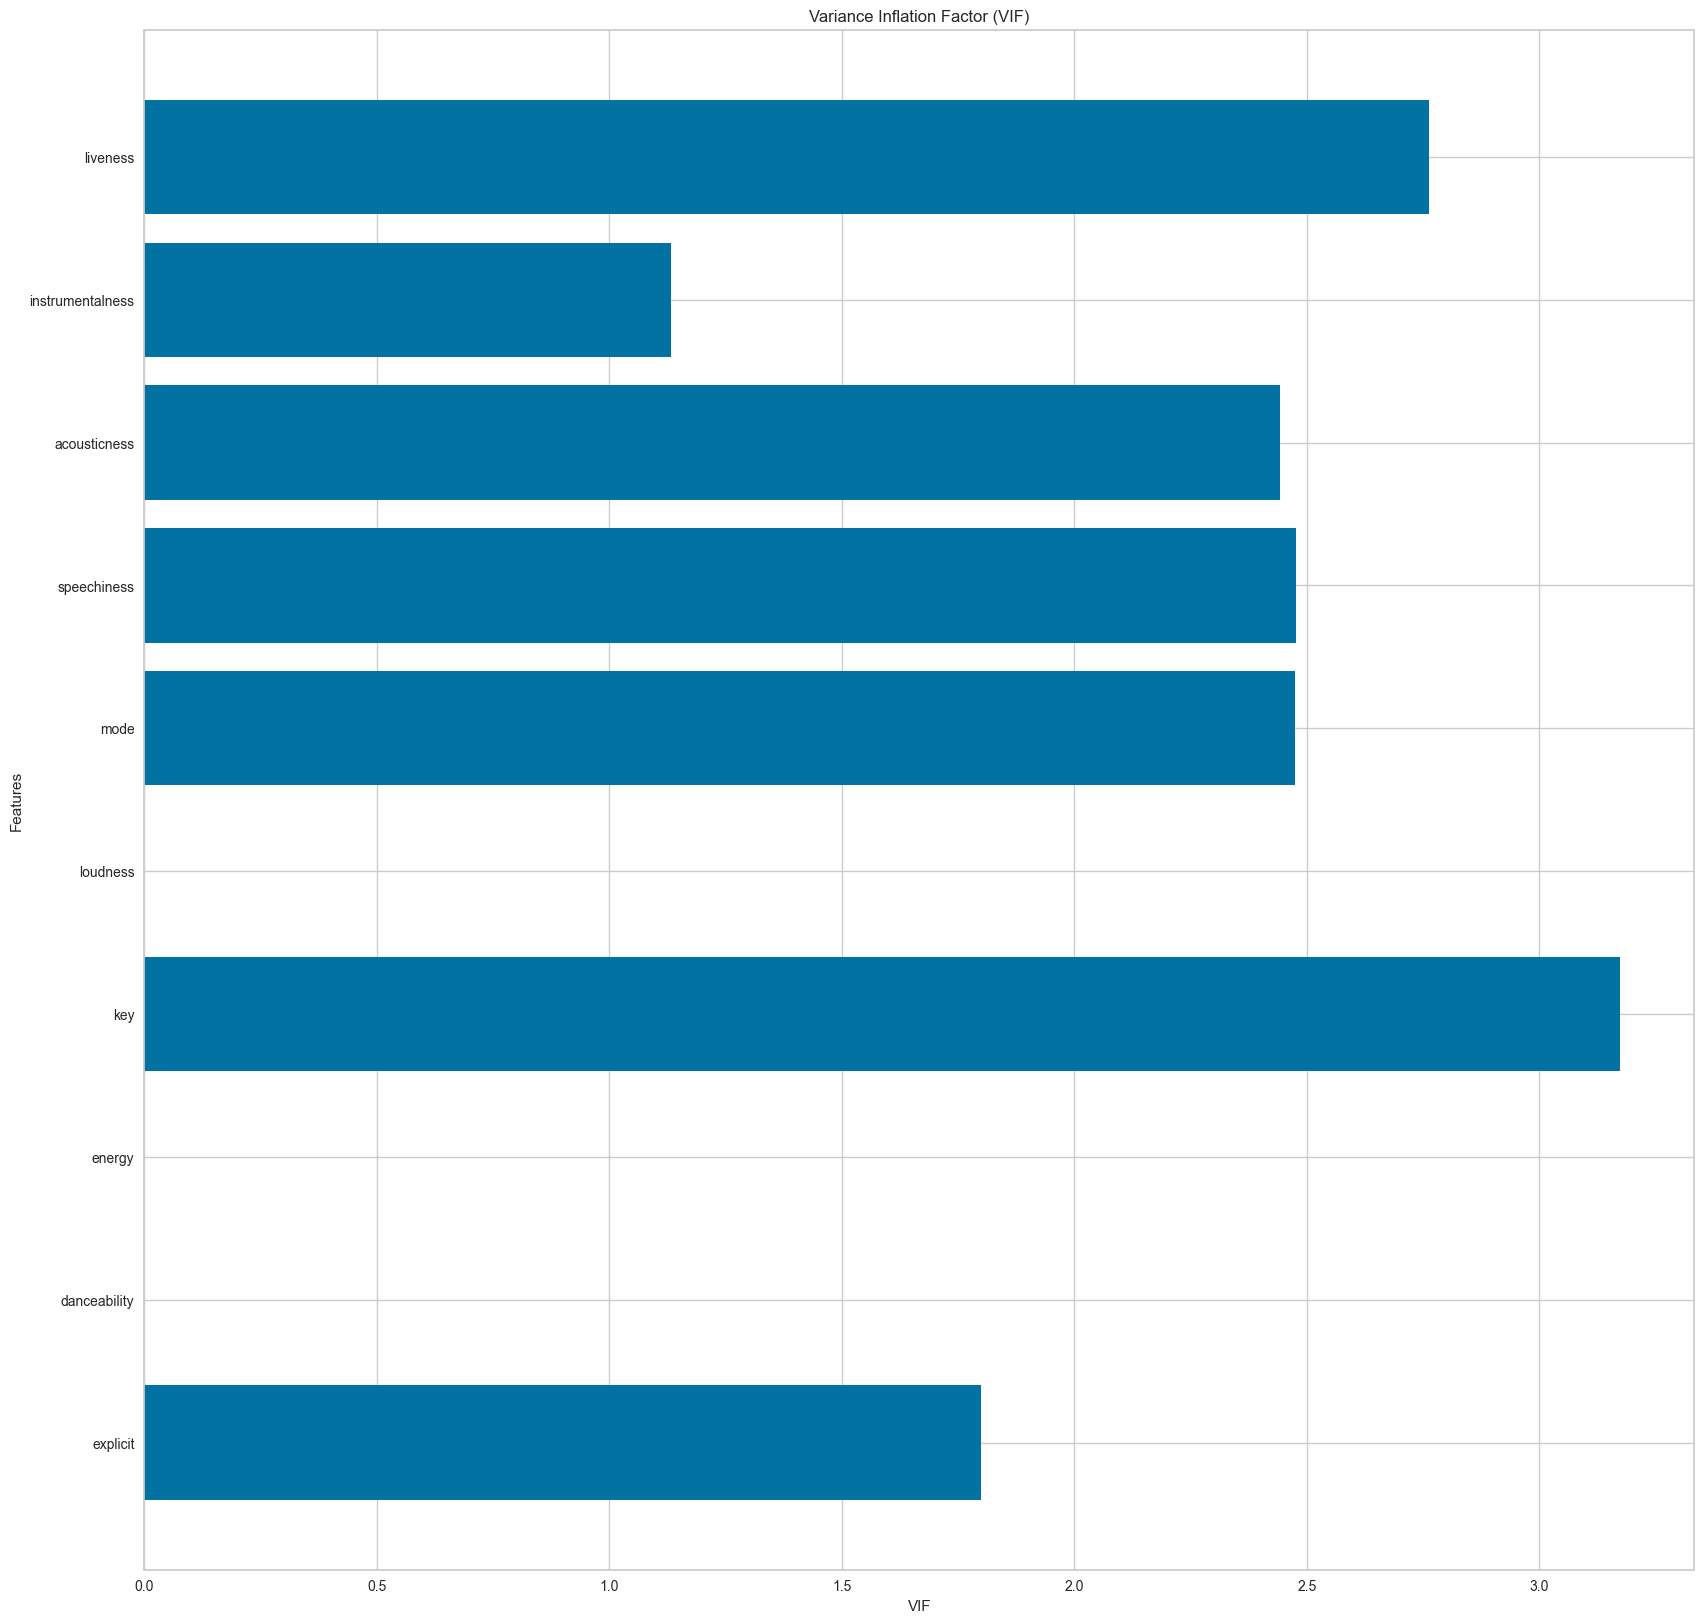

In [24]:
# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Plot VIF
plt.barh(vif_data["feature"], vif_data["VIF"])
plt.xlabel('VIF')
plt.ylabel('Features')
plt.title('Variance Inflation Factor (VIF)')
plt.show()

In [25]:
# Modeling Split

In [26]:
# check shape of x
X.shape # (2455, 12)


(2455, 12)

In [27]:
from sklearn.model_selection import train_test_split

# Split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
# X_train, X_test, y_train, y_test = train_test_split(X,y_scaled_series, test_size = 0.2, random_state = 42)

# split the 20% by half (10% test, 10% validation)
X_val, X_test, y_val, y_test=train_test_split(X_test,y_test,test_size=0.5)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(1964, 12)
(245, 12)
(246, 12)


In [28]:
# LR original

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, r2_score

# Sample data loading
# Assuming X and y are your features and target variable respectively
# X_train, X_val, X_test, y_train, y_val, y_test = your_data_loading_function()

# Sample train-validation-test split
# X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2


# fit regular regression
LR = LinearRegression()
LR.fit(X_train, y_train)

# 2.1 make predictions on the testing data based on the pre-tuned model fitted with training data
LR_train_pred=LR.predict(X_test)
r_squared = r2_score(y_test, LR_train_pred)
print("R-squared on training data:\t\t\t\t", r_squared)

# Define the pipeline
pipeline = Pipeline([
    ('regression', LinearRegression())  # Linear Regression as the model
])

# Define the hyperparameters to tune
param_grid = {
    'regression__fit_intercept': [True, False],  # Example hyperparameter for Linear Regression
    # 'regression__normalize': [True, False],  # Whether to normalize the features or not
}

# Perform grid search cross-validation (5 fold CV) on validation data
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Refit the model with the best parameters using train + validation data
best_model = Pipeline([
    ('regression', LinearRegression(fit_intercept=best_params['regression__fit_intercept'],
                                    # normalize=best_params['regression__normalize']
                                    ))
])
best_model.fit(X_val, y_val)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) on test data:\t\t\t", mse)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared on testing data:\t\t\t\t", r_squared)


R-squared on training data:				 0.2587230345256142
Mean Squared Error (MSE) on test data:			 0.03887713783578423
R-squared on testing data:				 0.2208684011308666


In [29]:
# Stepsize

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


# Fit Linear Regression model first
LR = LinearRegression()
LR.fit(X_train, y_train)

# Make predictions on the testing data based on the pre-tuned model fitted with training data
LR_train_pred = LR.predict(X_test)
r_squared = r2_score(y_test, LR_train_pred)
print("R-squared on training data:", r_squared)

# Perform stepwise selection using backward elimination
X_train_with_const = sm.add_constant(X_train)
initial_model = sm.OLS(y_train, X_train_with_const).fit()

# using backward elimination
while True:
    p_values = initial_model.pvalues[1:]  # Exclude the constant term
    max_p_value = p_values.max()

    if max_p_value > 0.05:
        feature_to_remove = p_values.idxmax()
        X_train_with_const.drop(columns=[feature_to_remove], inplace=True)
        print(f"Removing feature '{feature_to_remove}' (p-value: {max_p_value})")
        initial_model = sm.OLS(y_train, X_train_with_const).fit()
    # until no more p values > 0.05
    else:
        break

# Refit the model with selected features (redefine train, test, val)
selected_features = X_train_with_const.columns.tolist()[1:]  # Exclude the constant term

print(selected_features)
# X_train_selected = X_train[selected_features]
# X_val_selected = X_val[selected_features]
# X_test_selected = X_test[selected_features]


# best_model = LinearRegression().fit(X_train_selected, y_train)

# # Make predictions on the test set
# y_pred = best_model.predict(X_test_selected)

# # Evaluate the model using Mean Squared Error (MSE)
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error (MSE) on test data after stepwise regress:", mse)

# # Calculate R-squared
# r_squared = r2_score(y_test, y_pred)
# print("R-squared on test data:", r_squared)


R-squared on training data: 0.2587230345256142
Removing feature 'liveness' (p-value: 0.5948983566754262)
Removing feature 'mode' (p-value: 0.583607043938718)
Removing feature 'key' (p-value: 0.5780207554020486)
Removing feature 'speechiness' (p-value: 0.5339310278747609)
['explicit', 'danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'upbeat', 'discoability']


In [30]:
print(selected_features)

['explicit', 'danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'upbeat', 'discoability']


In [31]:
X[selected_features] # 2455 x 8

,explicit,danceability,energy,loudness,acousticness,instrumentalness,upbeat,discoability
0,0,0.514,0.730,-5.934,0.00146,0.000095,0.6220,-1.563333
1,0,0.825,0.652,-3.183,0.58100,0.000000,0.7385,-0.568667
2,0,0.501,0.405,-5.679,0.75100,0.000000,0.4530,-1.591000
3,0,0.755,0.522,-4.368,0.53300,0.000000,0.6385,-1.030333
4,1,0.679,0.587,-7.015,0.14100,0.000006,0.6330,-1.916333
...,...,...,...,...,...,...,...,...
2450,1,0.818,0.673,-7.542,0.34800,0.000000,0.7455,-2.017000
2451,1,0.801,0.745,-3.733,0.39800,0.006030,0.7730,-0.729000
2452,0,0.551,0.819,-4.489,0.01030,0.043700,0.6850,-1.039667
2453,1,0.786,0.853,-4.955,0.27300,0.000000,0.8195,-1.105333


In [32]:
# LR subset with stepsize

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, r2_score


X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]
X_test_selected = X_test[selected_features]

# fit regular regression
LR = LinearRegression()
LR.fit(X_train_selected, y_train)

# 2.1 make predictions on the testing data based on the pre-tuned model fitted with training data
LR_train_pred=LR.predict(X_test_selected)
r_squared = r2_score(y_test, LR_train_pred)
print("R-squared on training data:\t\t\t\t", r_squared)

# Define the pipeline
pipeline = Pipeline([
    # ('feature_selection', SelectFromModel(Lasso())),
    ('regression', LinearRegression())  # Linear Regression as the model
])

# Define the hyperparameters to tune
param_grid = {
    # 'feature_selection__estimator__alpha': [0.0001, 0.001, 0.01, 0.1],  # Lasso regularization parameter
    'regression__fit_intercept': [True, False],  # Example hyperparameter for Linear Regression
    # 'regression__normalize': [True, False],  # Whether to normalize the features or not
    'regression__copy_X': [True, False],  # Whether to copy the input data before fitting
    'regression__positive': [True, False],  # Whether to constrain the coefficients to be positive
    # 'regression__tol': ['copy_X', 'fit_intercept', 'n_jobs', 'positive'],  # Tolerance for optimization
    'regression__n_jobs': [None, -1],  # Number of jobs to run in parallel (-1: use all processors)
}

# Perform grid search cross-validation (5 fold CV) on validation data
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_selected, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Refit the model with the best parameters using train + validation data
best_model = Pipeline([
    # ('feature_selection', SelectFromModel(Lasso(alpha=best_params['feature_selection__estimator__alpha']))),
    ('regression', LinearRegression(fit_intercept=best_params['regression__fit_intercept'],
                                    # normalize=best_params['regression__normalize'],
                                    copy_X=best_params['regression__copy_X'],
                                    positive=best_params['regression__positive'],
                                    # tol=best_params['regression__tol'],
                                    n_jobs=best_params['regression__n_jobs']))
])
best_model.fit(X_val_selected, y_val)

# Make predictions on the test set
y_pred = best_model.predict(X_test_selected)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) on test data:\t\t\t", mse)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared on testing data:\t\t\t\t", r_squared)


R-squared on training data:				 0.2565998505110161


Mean Squared Error (MSE) on test data:			 0.038564325000165094
R-squared on testing data:				 0.22713744196901164


In [33]:
# LR + LASSO

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, r2_score



# fit regular regression
LR = LinearRegression()
LR.fit(X_train, y_train)

# 2.1 make predictions on the testing data based on the pre-tuned model fitted with training data
LR_train_pred=LR.predict(X_test)
r_squared = r2_score(y_test, LR_train_pred)
print("R-squared on training data:\t\t\t\t", r_squared)

# Define the pipeline
pipeline = Pipeline([
    ('feature_selection', SelectFromModel(Lasso())),
    ('regression', LinearRegression())  # Linear Regression as the model
])

# Define the hyperparameters to tune
param_grid = {
    'feature_selection__estimator__alpha': [0.0001, 0.001, 0.01, 0.1],  # Lasso regularization parameter
    'regression__fit_intercept': [True, False],  # Example hyperparameter for Linear Regression
    # 'regression__normalize': [True, False],  # Whether to normalize the features or not
}

# Perform grid search cross-validation (5 fold CV) on validation data
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Refit the model with the best parameters using train + validation data
best_model = Pipeline([
    ('feature_selection', SelectFromModel(Lasso(alpha=best_params['feature_selection__estimator__alpha']))),
    ('regression', LinearRegression(fit_intercept=best_params['regression__fit_intercept'],
                                    # normalize=best_params['regression__normalize']
                                    ))
])
best_model.fit(X_val, y_val)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) on test data:\t\t\t", mse)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared on testing data:\t\t\t\t", r_squared)


R-squared on training data:				 0.2587230345256142


Mean Squared Error (MSE) on test data:			 0.038623592852529344
R-squared on testing data:				 0.2259496627459332


In [34]:
# SPLIT

In [35]:
# Polynomial using stepwise

# PROTOTYPE 2

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Perform polynomial transformation
degree = 2  # Degree of polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Fit polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Make predictions on training and test data
y_train_pred = poly_reg.predict(X_train_poly)
y_test_pred = poly_reg.predict(X_test_poly)

# Evaluate model performance
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("R-squared on training data:\t\t\t\t", train_r2)
print("R-squared on testing data:\t\t\t\t", test_r2)

"Mean Squared Error (MSE) on test data:\t\t\t"

# print("Train R-squared:", train_r2)
# print("Test R-squared:", test_r2)
print("Mean Squared Error (MSE) on training data:\t\t", train_mse)
print("Mean Squared Error (MSE) on testing data:\t\t", test_mse)

R-squared on training data:				 0.3865670511250958
R-squared on testing data:				 0.2625385689996216
Mean Squared Error (MSE) on training data:		 0.0331908580488335
Mean Squared Error (MSE) on testing data:		 0.03679787823159769


In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('reg', LinearRegression())
])

# Define the hyperparameters to tune
param_grid = {
    'poly__degree': [1, 2, 3, 4, 5]  # Degrees of polynomial features to try
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='r2', cv=5)

# Fit GridSearchCV to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_degree = grid_search.best_params_['poly__degree']

# Make predictions on training and test data
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)

# Evaluate model performance
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Print the results
print("Best degree of polynomial features:", best_degree)
print("R-squared on training data:\t\t\t\t", train_r2)
print("R-squared on testing data:\t\t\t\t", test_r2)
print("Mean Squared Error (MSE) on training data:\t\t", train_mse)
print("Mean Squared Error (MSE) on testing data:\t\t", test_mse)


Best degree of polynomial features: 2
R-squared on training data:				 0.3865670511250958
R-squared on testing data:				 0.2978456535871439
Mean Squared Error (MSE) on training data:		 0.0331908580488335
Mean Squared Error (MSE) on testing data:		 0.0360811265233932


In [37]:
# PROTOTYPE 3

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have already defined X_train, X_val, X_test, y_train, y_val, y_test and selected_features

# Define the subset of features selected from stepwise selection
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]
X_test_selected = X_test[selected_features]

# Define the pipeline
pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures()),  # Add polynomial features
    ('regression', LinearRegression())  # Linear Regression as the model
])

# Define the hyperparameters to tune
param_grid = {
    'polynomial_features__degree': [1, 2, 3],  # Degree of polynomial features
    'regression__fit_intercept': [True, False],  # Example hyperparameter for Linear Regression
    'regression__copy_X': [True, False],  # Whether to copy the input data before fitting
    'regression__positive': [True, False],  # Whether to constrain the coefficients to be positive
    'regression__n_jobs': [None, -1],  # Number of jobs to run in parallel (-1: use all processors)
}

# Perform grid search cross-validation (5 fold CV) on validation data
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_selected, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

print(best_params)

# Refit the model with the best parameters using train + validation data
best_model = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=best_params['polynomial_features__degree'])),
    ('regression', LinearRegression(fit_intercept=best_params['regression__fit_intercept'],
                                    copy_X=best_params['regression__copy_X'],
                                    positive=best_params['regression__positive'],
                                    n_jobs=best_params['regression__n_jobs']))
])
best_model.fit(X_val_selected, y_val)

# Make predictions on the test set
y_pred = best_model.predict(X_test_selected)

# Evaluate the model using Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE) on test data:", mse)
print("R-squared on test data:", r_squared)


{'polynomial_features__degree': 2, 'regression__copy_X': True, 'regression__fit_intercept': True, 'regression__n_jobs': None, 'regression__positive': False}
Mean Squared Error (MSE) on test data: 0.051701595980083004
R-squared on test data: -0.00613544619678108


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
28 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
28 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Library/Frameworks/Python.framework/Versions

In [38]:
# poly with tuning

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have already defined X_train, X_val, X_test, y_train, y_val, y_test and selected_features

# Define the subset of features selected from stepwise selection
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]
X_test_selected = X_test[selected_features]

# Define the pipeline
pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures()),  # Add polynomial features
    ('regularization', Lasso()),  # Lasso regularization
])

# Define the hyperparameters to tune
param_grid = {
    'polynomial_features__degree': [1, 2, 3],  # Degree of polynomial features
    'regularization__alpha': [0.1, 1.0, 10.0],  # Regularization strength
    'regularization__fit_intercept': [True, False],  # Example hyperparameter for Lasso
    # 'regularization__normalize': [True, False],  # Whether to normalize the features or not
    'regularization__positive': [True, False],  # Whether to constrain the coefficients to be positive
}

# Perform grid search cross-validation (5 fold CV) on validation data
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_selected, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(best_params)

# Refit the model with the best parameters using train + validation data
best_model = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=best_params['polynomial_features__degree'])),
    ('regularization', Lasso(alpha=best_params['regularization__alpha'],
                              fit_intercept=best_params['regularization__fit_intercept'],
                              # normalize=best_params['regularization__normalize'],
                              positive=best_params['regularization__positive']))
])
best_model.fit(X_val_selected, y_val)

# Make predictions on the test set
y_pred = best_model.predict(X_test_selected)

# Evaluate the model using Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE) on test data:", mse)
print("R-squared on test data:", r_squared)


{'polynomial_features__degree': 3, 'regularization__alpha': 0.1, 'regularization__fit_intercept': True, 'regularization__positive': False}
Mean Squared Error (MSE) on test data: 0.04365451017227546
R-squared on test data: 0.15046432826552425


In [39]:
# SPLIT-----------------------------------------------------------------

In [167]:
# RF original (4 mins)

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, r2_score


# Fit Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the testing data based on the pre-tuned model fitted with training data
rf_train_pred = rf_regressor.predict(X_test)

# Evaluate the model using R-squared
r_squared = r2_score(y_test, rf_train_pred)
print("R-squared on training data:", r_squared)

# Define the pipeline
pipeline = Pipeline([
    ('feature_selection', SelectFromModel(RandomForestRegressor(random_state=42))),
    ('regression', RandomForestRegressor(random_state=42))  # Random Forest Regressor as the model
])

# Define the hyperparameters to tune
param_grid = {
    'feature_selection__threshold': ['median', 'mean', '1.25*median'],  # Threshold for feature selection
    'regression__n_estimators': [50, 100, 200],  # Number of trees in the forest
    'regression__max_depth': [None, 10, 20],  # Maximum depth of the trees
}

# Perform grid search cross-validation (5 fold CV) on validation data
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Refit the model with the best parameters using train + validation data
best_model = Pipeline([
    ('feature_selection', SelectFromModel(RandomForestRegressor(random_state=42), threshold=best_params['feature_selection__threshold'])),
    ('regression', RandomForestRegressor(n_estimators=best_params['regression__n_estimators'],
                                          max_depth=best_params['regression__max_depth'],
                                          random_state=42))
])
best_model.fit(X_val, y_val)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) on test data:", mse)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared on test data:", r_squared)


R-squared on training data: 0.3300435251375128
Mean Squared Error (MSE) on test data: 0.02291778863776738
R-squared on test data: 0.5540099089825703


In [168]:
# RF with poly features ( so much longer)

degree = 2  # Degree of polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_val_poly = poly_features.fit_transform(X_val)
X_test_poly = poly_features.transform(X_test)

# Fit Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train_poly, y_train)

# Make predictions on the testing data based on the pre-tuned model fitted with training data
rf_train_pred = rf_regressor.predict(X_test_poly)

# Evaluate the model using R-squared
r_squared = r2_score(y_test, rf_train_pred)
print("R-squared on training data:", r_squared)

# Define the pipeline
pipeline = Pipeline([
    ('feature_selection', SelectFromModel(RandomForestRegressor(random_state=42))),
    ('regression', RandomForestRegressor(random_state=42))  # Random Forest Regressor as the model
])

# Define the hyperparameters to tune
param_grid = {
    'feature_selection__threshold': ['median', 'mean', '1.25*median'],  # Threshold for feature selection
    'regression__n_estimators': [50, 100, 200],  # Number of trees in the forest
    'regression__max_depth': [None, 10, 20],  # Maximum depth of the trees
}

# Perform grid search cross-validation (5 fold CV) on validation data
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_poly, y_train)

# Get the best hyperparameters
best_RF_params = grid_search.best_params_

# Refit the model with the best parameters using train + validation data
best_model = Pipeline([
    ('feature_selection', SelectFromModel(RandomForestRegressor(random_state=42), threshold=best_params['feature_selection__threshold'])),
    ('regression', RandomForestRegressor(n_estimators=best_params['regression__n_estimators'],
                                           max_depth=best_params['regression__max_depth'],
                                          random_state=42))
])
best_model.fit(X_val_poly, y_val)

# Make predictions on the test set
y_pred = best_model.predict(X_test_poly)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) on test data:", mse)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared on test data:", r_squared)

R-squared on training data: 0.33815179633912706
Mean Squared Error (MSE) on test data: 0.021592597140291502
R-squared on test data: 0.5797987093732333


In [42]:
# SPLIT

In [72]:
# recommendtion system test

# 1. column normalization

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

testing_df=df.copy()
testing_df # 2455* 21

# Select only numeric columns
numeric_cols = testing_df.select_dtypes(include=['number'])

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the scaler on the numeric data
testing_df[numeric_cols.columns] = scaler.fit_transform(numeric_cols)

In [74]:
# 2. K-Means Clustering
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=5)
pred=kmeans.fit_predict(testing_df.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']))
testing_df['pred']=pred
testing_df['pred'] = scaler.fit_transform(testing_df[['pred']])
print(testing_df['pred'])

0       0.25
1       0.50
2       1.00
3       0.25
4       0.00
        ... 
2450    0.75
2451    0.75
2452    0.25
2453    0.75
2454    0.75
Name: pred, Length: 2455, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [89]:
print(testing_df) # 2455 x 22

# print(testing_df.columns)

# # Use select_dtypes to select columns of non-numeric types
# print(testing_df.select_dtypes(exclude=['number']).columns)
# # print(testing_df.select_dtypes(exclude=['number']).columns.columns)
# print(list(range(len(non_numeric_columns_names)))) # [0, 1, 2, 3]

                                         track_name           artist  \
0                                   Blinding Lights       The Weeknd   
1                                      Shape of You       Ed Sheeran   
2                                 Someone You Loved    Lewis Capaldi   
3     Sunflower - Spider-Man: Into the Spider-Verse      Post Malone   
4                                           Starboy       The Weeknd   
...                                             ...              ...   
2450                                            512             Mora   
2451                                          Diosa      Myke Towers   
2452                                         A-Punk  Vampire Weekend   
2453                                            TQM    Fuerza Regida   
2454                                 NI BIEN NI MAL        Bad Bunny   

                                        album release_date  popularity  \
0                                 After Hours   2020-03-20   

In [171]:
tuned_RF=RandomForestRegressor(n_estimators=best_params['regression__n_estimators'],
                                           max_depth=best_params['regression__max_depth'],
                                          random_state=42)

In [172]:
tuned_RF

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

In [105]:
# 5 to 22
print(testing_df.select_dtypes(include=['number']).columns)


Index(['popularity', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'duration_min', 'upbeat',
       'discoability', 'pred'],
      dtype='object')


In [154]:
# 3. 

from tqdm import tqdm

class Song_Recommender():
    """
    Neighbourhood Based Collborative Filterng REcoomendation System using similarity Metrics
    Manhattan Distance is calculated for all songs and Recommend Songs that are similar to it based on any given song
    """
    def __init__(self, data):
        self.data_ = data
    
    #function which returns recommendations, we can also choose the amount of songs to be recommended
    def get_recommendations(self, song_name, n_top):
        distances = []
        # print(self.data)
        #choosing the given song_name and dropping it from the data
        print(self.data_[(self.data_.track_name.str.lower() == song_name.lower())])
        song = self.data_[(self.data_.track_name.str.lower() == song_name.lower())].head(1).values[0]
        rem_data = self.data_[self.data_.track_name.str.lower() != song_name.lower()]
        for r_song in tqdm(rem_data.values):
            dist = 0
            for col in np.arange(len(rem_data.columns)):
                #indeces of non-numerical columns(id,Release date,name,artists)
                if not col in [0,1,2,3]:
                    #calculating the manhettan distances for each numerical feature
                    dist = dist + np.absolute(float(song[col]) - float(r_song[col]))
            distances.append(dist)
        rem_data['distance'] = distances
        #sorting our data to be ascending by 'distance' feature
        rem_data = rem_data.sort_values('distance')
        columns = ['artist', 'track_name']
        return rem_data[columns][:n_top]

In [173]:
# prototype for 3

from tqdm import tqdm

class Song_Recommender():
    """
    Neighbourhood Based Collborative Filterng REcoomendation System using similarity Metrics
    Manhattan Distance is calculated for all songs and Recommend Songs that are similar to it based on any given song
    """
    def __init__(self, data):
        self.data_ = data
        # self.regression_model=RandomForestRegressor()
        self.regression_model=tuned_RF
    
    #function which returns recommendations, we can also choose the amount of songs to be recommended
    def get_recommendations(self, song_name, n_top):
        distances = []
        # choosing the given song_name and dropping it from the data
        song = self.data_[(self.data_.track_name.str.lower() == song_name.lower())].head(1).values[0]
        rem_data = self.data_[self.data_.track_name.str.lower() != song_name.lower()]

        # Fit your regression model on available data

        feature_list=['popularity', 'explicit', 'danceability', 'energy', 'key', 'loudness',
        'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
         'tempo', 'time_signature', 'duration_min', 'upbeat',
        'discoability'] # 16

        X_train = rem_data[feature_list]  # Select features for regression
        y_train = rem_data['valence']  # Target feature for regression
        self.regression_model.fit(X_train, y_train)

        # Predict features for the given song
        # Initialize an empty list to store the features
        song_feature_values = []

        # Iterate over the feature names and append their values to the list
        for i in range(5, 22):  # Assuming your features are named 'feature1', 'feature2', ..., 'feature20'
            if i!=16: # exclude valence
                # feature_name = f'feature{i}'
                song_feature_values.append(song[i])

        # Convert the list of feature values into a numpy array and reshape it
        song_features = np.array(song_feature_values).reshape(1, -1)

        # Predict valence for the given song
        predicted_valence = self.regression_model.predict(song_features)

        # Concatenate the predicted valence with the rest of the features of the given song
        song_features_with_valence = np.concatenate((song_features, predicted_valence.reshape(1, -1)), axis=1)

        # song_features = np.array([song['feature1'], song['feature2'], ...]).reshape(1, -1)
        # predicted_features = self.regression_model.predict(song_features)
        # print(predicted_features)
        # print(predicted_features.reshape(1, -1))

        # # Convert the predicted features ndarray to a DataFrame
        # predicted_df = pd.DataFrame(predicted_features.reshape(1, -1), columns=feature_list)

        # Calculate Manhattan distance using predicted and actual features
        distances = np.sum(np.abs(song_features_with_valence - rem_data.values[:, 5:]), axis=1)
        # distances = np.abs(predicted_df.values - rem_data[feature_list].values)

        # distances=np.sum(np.abs(predicted_features - rem_data['valence']))

        rem_data['distance'] = distances
        #sorting our data to be ascending by 'distance' feature
        rem_data = rem_data.sort_values('distance')
        columns = ['artist', 'track_name']
        return rem_data[columns][:n_top]

In [174]:
# Instanstiate the Recommender Class

recommender = Song_Recommender(testing_df)
recommender.get_recommendations('Blinding Lights', 5)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/var/folders/vz/8f0dlrxd14g849p0gddrr1c00000gn/T/ipykernel_35968/3702255871.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rem_data['distance'] = distances


,artist,track_name
1441,Taylor Swift,Getaway Car
192,Arctic Monkeys,505
2406,Metallica,For Whom The Bell Tolls (Remastered)
1566,OneRepublic,Secrets
1916,One Direction,They Don't Know About Us


In [185]:
# Instanstiate the Recommender Class

recommender = Song_Recommender(testing_df)
recommender.get_recommendations("Let Her Go", 3)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/var/folders/vz/8f0dlrxd14g849p0gddrr1c00000gn/T/ipykernel_35968/3702255871.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rem_data['distance'] = distances


,artist,track_name
2166,Teddy Swims,Lose Control
2420,Miley Cyrus,When I Look At You
2424,Tame Impala,"New Person, Same Old Mistakes"


In [ ]:
# SPLIT

In [43]:
# # MLP TRY
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn.neural_network import MLPRegressor
# from sklearn.metrics import mean_squared_error, r2_score

# # # Split the data into training and testing sets
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define the pipeline without tuning
# pipeline = Pipeline([
#     ('regression', MLPRegressor(random_state=42))  # MLP Regressor as the model
# ])

# # Fit the model without tuning
# pipeline.fit(X_train, y_train)

# # Make predictions on the testing data before tuning
# y_pred = pipeline.predict(X_test)

# # Calculate R-squared before tuning
# r_squared_before_tuning = r2_score(y_test, y_pred)
# print("R-squared on testing data before tuning:", r_squared_before_tuning)

# # Define the hyperparameters to tune
# param_grid = {
#     'regression__hidden_layer_sizes': [(100,), (50, 50), (100, 50, 25)],  # Number of neurons in each hidden layer
#     'regression__activation': ['relu', 'tanh'],  # Activation function
#     'regression__solver': ['adam', 'sgd'],  # Solver for weight optimization
#     'regression__alpha': [0.0001, 0.001, 0.01],  # L2 penalty (regularization term) parameter
# }

# # Perform grid search cross-validation (5 fold CV) on validation data
# grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_

# # Refit the model with the best parameters using train + validation data
# best_model = MLPRegressor(hidden_layer_sizes=best_params['regression__hidden_layer_sizes'],
#                           activation=best_params['regression__activation'],
#                           solver=best_params['regression__solver'],
#                           alpha=best_params['regression__alpha'],
#                           random_state=42)
# best_model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = best_model.predict(X_test)

# # Evaluate the model using Mean Squared Error (MSE)
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error (MSE) on test data:", mse)

# # Calculate R-squared
# r_squared = r2_score(y_test, y_pred)
# print("R-squared on test data:", r_squared)


R-squared on testing data before tuning: 0.2363168005615025


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Mean Squared Error (MSE) on test data: 0.0400609598015222
R-squared on test data: 0.2203963746012172


In [ ]:
# MLP with poly???